<a name = 'content'></a>

# Лабораторная работа №3

## Оглавление:

----

### [1. Задание и вариант](#step1)

### [2. Подготовительная часть](#step2)

### [3. Аналитическое решение](#step3)

### [4. Метод Либмана](#step4)

* [Теория](#step4.1)

* [Программная реализация](#step4.2)

* [Исследовательская часть](#step4.3)

### [5. Метод верхних релаксаций](#step5)

* [Теория](#step5.1)

* [Программная реализация](#step5.2)

* [Исследовательская часть](#step5.3)

### [6. Метод Зейделя](#step6)

* [Теория](#step6.1)

* [Программная реализация](#step6.2)

* [Исследовательская часть](#step6.3)


<a name = 'step1'></a>

## Задание

[К оглавлению](#content)

Решить краевую задачу для дифференциального уравнения эллиптического типа. Аппроксимацию уравнения произвести с использованием центрально-разностной схемы. Для решения дискретного аналога применить следующие методы: метод простых итераций (метод Либмана), метод Зейделя, метод простых итераций с верхней релаксацией. Вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,y)$. Исследовать зависимость погрешености от сеточных параметров $h_x, h_y$

### Вариант 7

Задача Дирихле:
$$\begin{aligned} 
&\frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2} = -2u \hspace{1cm}  \\ \\
&u(0,y) = \cos y\\
&u\left(\frac{\pi}{2}, y\right) = 0\\
&u(x,0) = \cos x\\
&u\left(x,\frac{\pi}{2}\right) = 0\end{aligned}$$

Аналитическое решение: $U(x,y) = \cos x\cos y$

<a name = 'step2'></a>
## Подготовительная часть

[К оглавлению](#content)

In [1]:
import math
import numpy as np
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import time
import plotly.io as pio
pio.renderers.default = 'svg'
import copy
co = 0

In [2]:
def analytic(x,y):
    return math.cos(x)*math.cos(y)
def f_1(x,y):
    return math.cos(y)
def f_2(x,y = None):
    return 0
def f_3(x,y = None):
    return math.cos(x)
def f_4(x,y = None):
    return 0
        
def MSE(x,y,u):
    error = 0
    for x_ in range(len(x)):
        for y_ in range(len(y)):
            error += (u[x_][y_] - analytic(x[x_],y[y_]))**2
    return (error/(len(x)*len(y)))/(len(x)*len(y))
            
def MAE(x,t,u):
    error = 0
    for x_ in range(len(x)):
        for y_ in range(len(y)):
            error += abs(u[x_][y_] - analytic(x[x_], y[y_]))
    return error/(len(x) * len(y))
    
def normm(x,t,u):
    errors = []
    for i in range(len(u)):
        maximum = 0
        for j in range(len(x)):
            tmp = abs(u[i][j] - analytic(x[j], t[i]))
            if maximum < tmp:
                maximum = tmp
        errors.append(maximum)
    return errors

def norm(current, prev, len_x, len_y):
    max_ = 0
    for i in range(len_x):
        for j in range(len_y):
            if (abs(current[i][j] - prev[i][j]) > max_):
                max_ = abs(current[i][j] - prev[i][j])
    return max_
def norm_error(x,t,u):
    ans = 0.0
    for i in range(len(u)):
        for j in range(len(u[i])):
            ans += (u[i][j] - analytic(x[i][j], t[i][j]))**2
    return ans/(len(u[0]) * len(u))**2
    
def construct_3d_plot(method, method_name):
    approx_e, X_e, T_e = method()
    z_plot = []
    for j in range(0, len(X_e), 1):
        tmp = []
        for i in range(0, len(X_e[j]), 1):
            tmp.append(analytic(X_e[j][i], T_e[j][i]))
        z_plot.append(tmp)
    line_marker = dict(color='#0066FF', width=2)
    lines = []
    lines.append(go.Scatter3d(x=X_e[0], y=T_e[0], z=approx_e[0], mode='lines', line=line_marker, name = method_name + "method", legendgroup=1))
    for i, j, k in zip(X_e[1:], T_e[1:], approx_e[1:]):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker, showlegend=False))
    line_marker = dict(color='#ff0000', width=2)
    fig_new = go.Figure(data = lines)
    fig_new.update_scenes(xaxis_title=dict(text = 'x'), yaxis_title = dict(text = 'y'), zaxis_title = dict(text = "U(x,y)"))
    fig_new.add_trace(go.Scatter3d(x=X_e[0], y=T_e[0], z=z_plot[0], mode='lines', line=line_marker, name = 'Analytic', legendgroup = 2))
    for i, j, k in zip(X_e[1:], T_e[1:], z_plot[1:]):
        fig_new.add_trace(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker, showlegend=False))
    fig_new.update_layout(title = 'Comparison 3D',
                          template = 'plotly_dark')
    fig_new.show()

    print("Total error = ", norm_error(X_e, T_e, approx_e))
    

  
    
def d3Analytic(xr = math.pi/2, yr = math.pi/2, len_x = 100, len_y = 100):
    hx = xr/len_x
    hy = yr/len_y
    x = [0 + hx * i for i in range(len_x)]
    y = [0 + hy * i for i in range(len_y)]
    X = [x for _ in range(len_x)]
    Y = [[y[i] for _ in x] for i in range(len_y)]
    z_plot = []
    for j in range(len(X)):
        tmp = []
        for i in range(len(X[j])):
            tmp.append(analytic(X[j][i], Y[j][i]))
        z_plot.append(tmp)
    line_marker = dict(color='#0066FF', width=2)
    lines = []
    fig_tmp = go.Figure()
    for i in range(len(z_plot)):
        fig_tmp.add_trace(go.Scatter(x = y, y = z_plot[i], name = "x = " + str(round(x[i],2))))
    fig_tmp.update_layout(title = 'Analytical Solution (different x)',
                         xaxis_title = 'y',
                         yaxis_title = r'$U(x,y) = \cos x \cos y$',
                         template = 'plotly_dark')
    fig_tmp.show()
    lines.append(go.Scatter3d(x=X[0], y=Y[0], z=z_plot[0], mode='lines', line=line_marker, name = "Analytic", legendgroup=1))
    for i, j, k in zip(X[1:], Y[1:], z_plot[1:]):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker, showlegend=False))
    line_marker = dict(color='#ff0000', width=2)
    fig_new = go.Figure(data = lines)
    fig_new.update_scenes(xaxis_title=dict(text = 'x'), yaxis_title = dict(text = 'y'), zaxis_title = dict(text = "U(x,y)"))
    fig_new.update_layout(title = "Analytical solution",
                          template = 'plotly_dark')
    fig_new.show()

<a name = 'step3'></a>

## Аналитическое решение
[К оглавлению](#content)

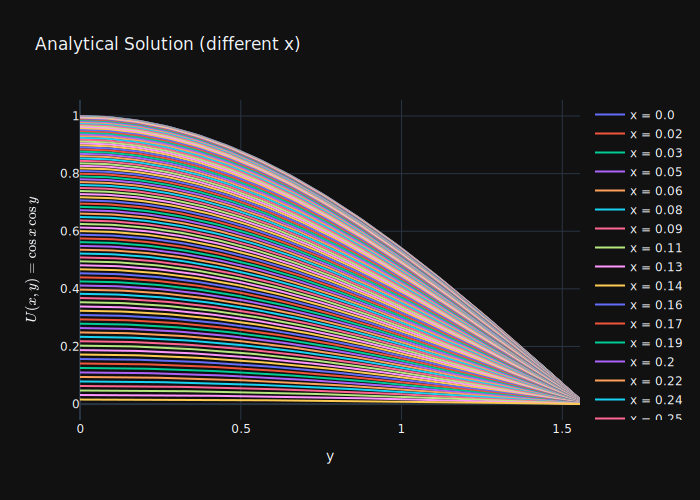

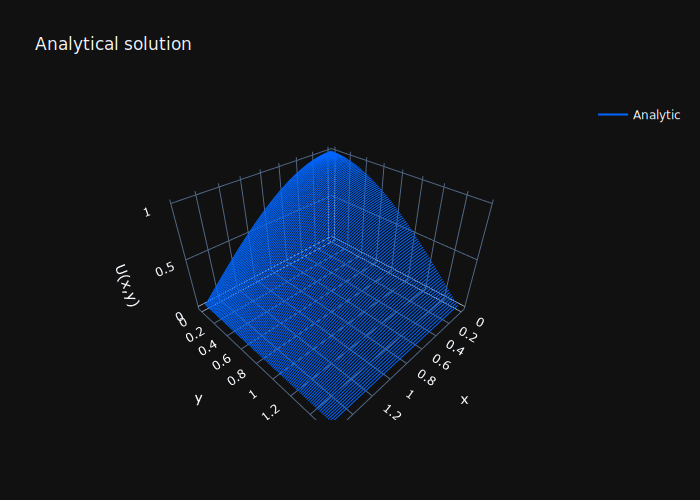

In [3]:
d3Analytic()

<a name = 'step4'></a>

## Метод Либмана

[К оглавлению](#content)

<a name = 'step4.1'></a>

### Теория

Рассматриваем краевую задачу в прямоугольнике $x \in [0,l_1],\ y \in [0,l_2]$, на который накладывается сетка:

$$\omega_{h_1,h_2} = \{x_i = ih_1,\ i = \overline{0,N_1}; \hspace{0.2cm} y_j = jh_2,\ j = \overline{0,N_2}\}$$

Внутренние узлы аппроксимируем с помощью отношения конечных разностей:

$$\begin{aligned} &\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h_1^2} + \frac{u_{i,j+1} -2u_{i,j} + u_{i,j-1}}{h_2^2} + O(h_1^2 + h_2^2) = f(x_i, y_j)\\
&i = \overline{1,N_1-1} \hspace{10cm} j = \overline{1,N_2-1} \end{aligned}$$

СЛАУ из этой системы -- пяти-диагональные матрицы с ленточной структурой. 

Метод Либмана -- один из методов решения подобных матриц:

Метод Либмана численного решения задачи Дирихле ($k$-номер итерации):

$$\begin{aligned} &u_{i,j}^{(k+1)} = \frac{1}{4}\left[ u_{i+1,j}^{(k} + u_{i-1,j}^{(k)} + u_{i,j+1}^{(k)} - h^2\cdot f_{i,j} \right], \hspace{0.5cm} f_{i,j} = f(x_i, y_j)\\
&i = \overline{1,N_1-1} \hspace{10cm} j = \overline{1,N_2-1} \end{aligned}$$

На нулевой итерации определим $u_{i,j}^{(0)}$ с помощью линейной интерполяции граничных значений.

Процесс Либмана прекращается, когда 
$$||u^{(k+1)} - u^{(k)}|| \leq \varepsilon \hspace{0.5cm} ||u^{(k)}|| = \underset{i,j}{\max}\left| u_{i,j}^{(k)} \right|$$

<a name = 'step4.2'></a>
### Реализация

In [16]:
def liebman(xr = math.pi/2, yr = math.pi/2, len_x = 50, len_y = 50, varepsilon = 0.0001):
    hx = xr/len_x
    hy = yr/len_y
    x = [0 + hx * i for i in range(len_x)]
    y = [0 + hy * i for i in range(len_y)]
    X = [x for _ in range(len_x)]
    Y = [[y[i] for _ in x] for i in range(len_y)]
    prev_t = np.zeros([len_x, len_y])
    cur_t = np.zeros([len_x, len_y])
    for j in range(len_y):
        coeff = (f_2(None, y[j]) - f_1(None, y[j])) / (len_x - 1)
        addition = f_1(None, y[j])
        for i in range(len_x):
            cur_t[i][j] = coeff * i + addition
    while (True):
        prev_t = copy.deepcopy(cur_t)
        for i in range(1,len_x-1):
            cur_t[i][0] = f_3(x[i])
            prev_t[i][0] = f_3(x[i])
            for j in range(1, len_y-1):
                left = 2*(1/(hx**2) + 1/(hy**2)-1)
                right_fst = 1/(hx**2)
                right_scd = 1/(hy**2)
                cur_t[i][j] = right_fst* (prev_t[i+1][j] + prev_t[i-1][j]) + \
                                right_scd* (prev_t[i][j+1] + prev_t[i][j-1])
                cur_t[i][j] /= (left)
            cur_t[i][-1] = f_4(x[i])
            prev_t[i][-1] = f_4(x[i])
        norm_ = norm(cur_t, prev_t, len_x, len_y)
        if norm_ <= varepsilon:
            break
    return cur_t, X, Y

<a name = 'step4.3'></a>
### Исследования

In [5]:
xr = math.pi/2
yr = math.pi/2
len_x = 100
len_y = 100
x_step = xr/len_x
y_step = yr/len_y
varepsilon = 0.0001
x = [0 + x_step*i for i in range(len_x)]
y = [0 + y_step*i for i in range(len_y)]


In [6]:
u_lib = liebman(xr,yr,len_x, len_y, varepsilon)[0]

MSE =  5.905759872464878e-07 
MAE =  0.06317633594120249


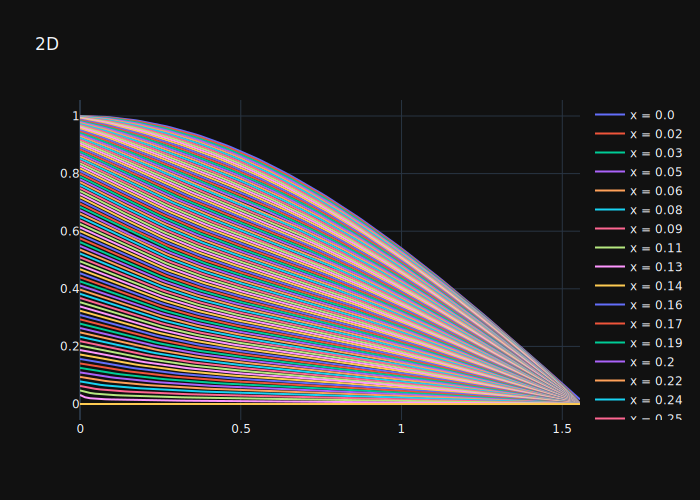

In [7]:
fig_tmp = go.Figure()
for i in range(len(u_lib)):
    fig_tmp.add_trace(go.Scatter(x = y, y = u_lib[i], name = "x = " + str(round(x[i],2))))
print("MSE = ", MSE(x,y,u_lib), "\nMAE = ", MAE(x,y,u_lib))
fig_tmp.update_layout(title = '2D', template = 'plotly_dark')
fig_tmp.show()

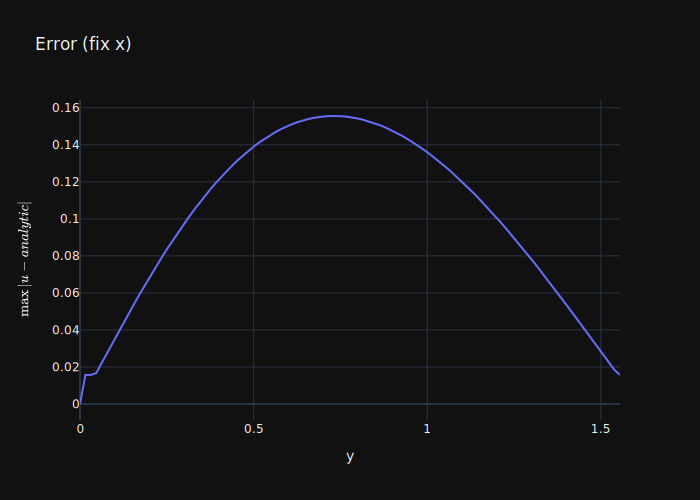

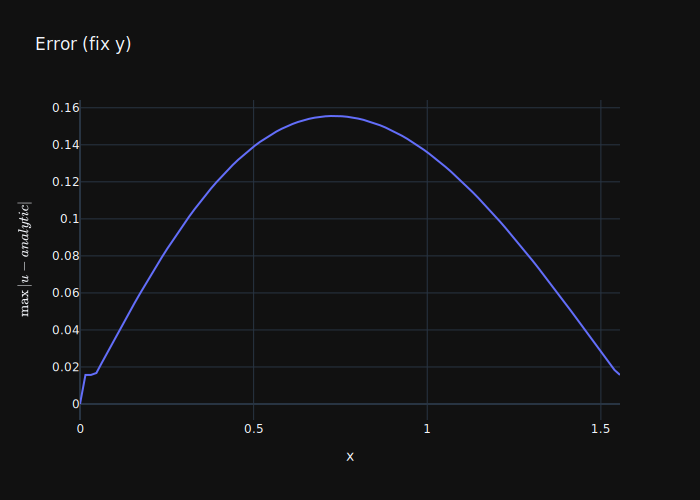

In [8]:
er = normm(x,y,u_lib)
fig_check_tmp = go.Figure()
fig_check_tmp.add_trace(go.Scatter(x = y, y = er))
fig_check_tmp.update_layout(title = "Error (fix x)",
                            xaxis_title = "y",
                            yaxis_title = r'$\max |u - analytic|$', 
                            template='plotly_dark')
fig_check_tmp.show()
fig_check_tmp = go.Figure()
fig_check_tmp.add_trace(go.Scatter(x = x, y = er))
fig_check_tmp.update_layout(title = "Error (fix y)",
                            xaxis_title = "x",
                            yaxis_title = r'$\max |u - analytic|$', 
                            template='plotly_dark')
fig_check_tmp.show()
#save_plot(fig_check_tmp)

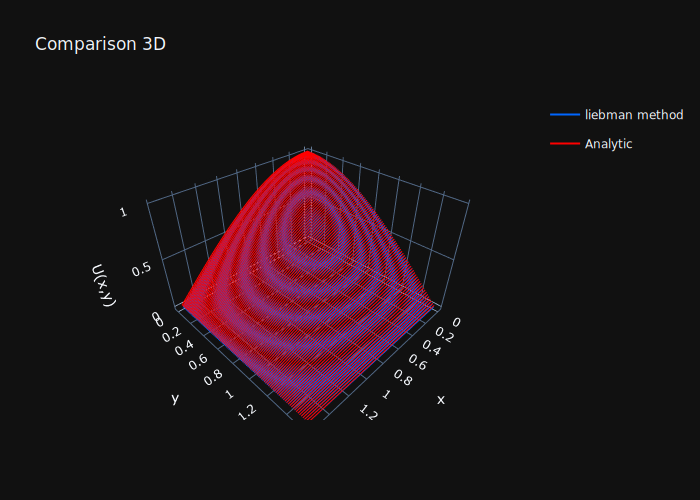

Total error =  5.905759872464878e-07


In [9]:
construct_3d_plot(liebman, 'liebman ')

In [14]:
from tqdm.notebook import tqdm
def error_data(method):
    h,e = [],[]        
    for N in tqdm(range(10, 40)):
        u, x, y = method(len_x = N, len_y = N)
        h.append(math.pi / 2*N)
        e.append(norm_error(x,y,u))
    return h,e
h,e = error_data(liebman)

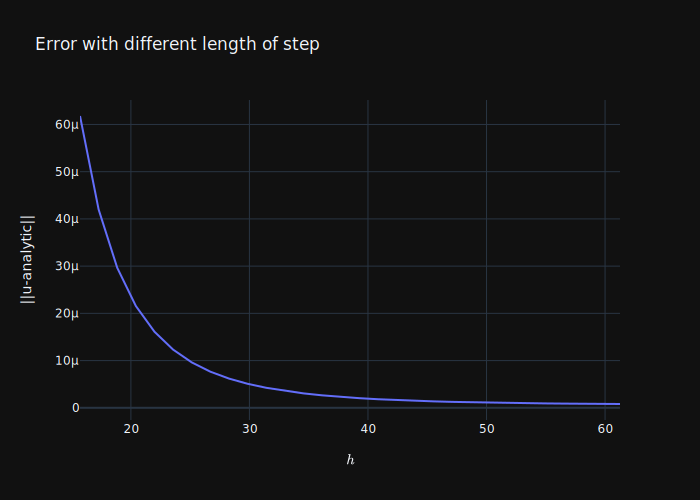

In [15]:
fig_error = go.Figure()
fig_error.add_trace(go.Scatter(x = h, y = e))
fig_error.update_layout(title = 'Error with different length of step',
                       xaxis_title = r'$h$',
                       yaxis_title = '||u-analytic||',
                       template = 'plotly_dark')
fig_error.show()

* Обратно пропорциональная зависимость у длины шага по пространственным компонентам и ошибкой метода

In [20]:
x_step = xr/50
y_step = yr/50
x = [0 + x_step*i for i in range(50)]
y = [0 + y_step*i for i in range(50)]
eps = np.linspace(0.0001, 0.1, 15)
mses = []
maes = []
errors = []
for i in tqdm(range(len(eps))):
    u_tmp, x_tmp, y_tmp = liebman(varepsilon=eps[i])
    errors.append(norm_error(x_tmp, y_tmp, u_tmp))
    mses.append(MSE(x,y,u_tmp))
    maes.append(MAE(x,y,u_tmp))

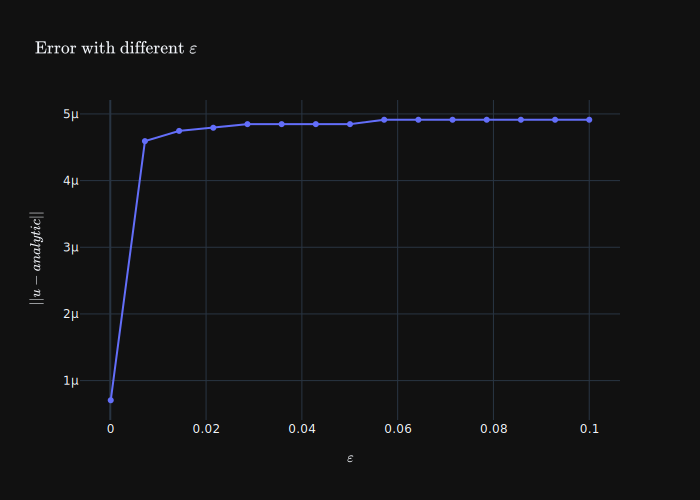

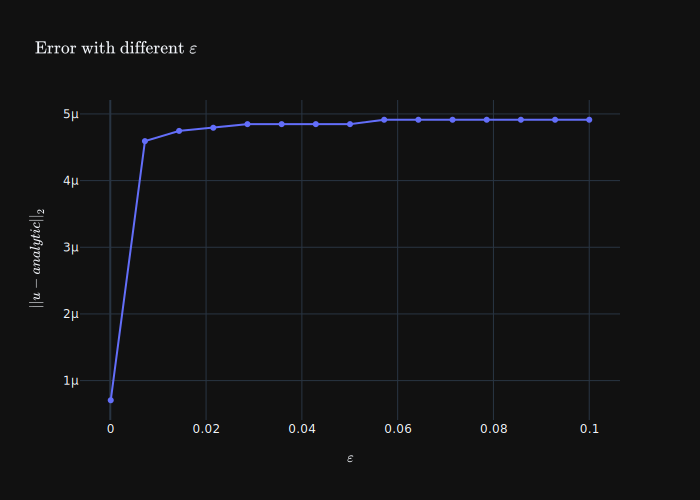

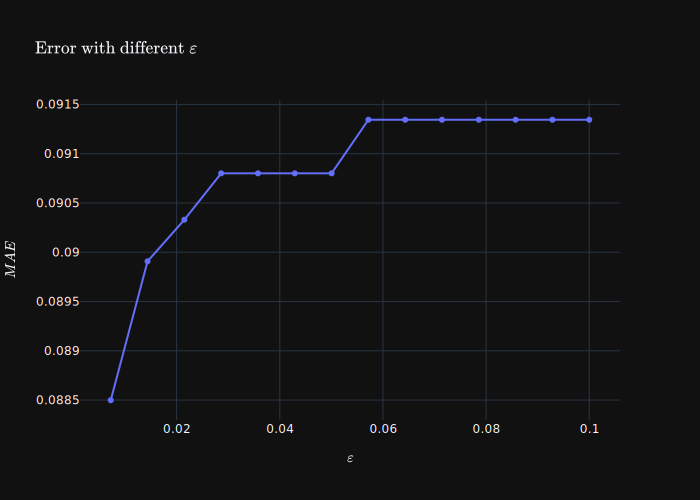

In [21]:
fig_norm = go.Figure()
fig_norm.add_trace(go.Scatter(x = eps, y = errors))
fig_norm.update_layout(title = r'$\text{Error with different }\varepsilon$',
                      xaxis_title = r'$\varepsilon$',
                      yaxis_title = r'$||u - analytic||$',
                      template = 'plotly_dark')
fig_mse = go.Figure()
fig_mse.add_trace(go.Scatter(x = eps, y = mses))
fig_mse.update_layout(title = r'$\text{Error with different }\varepsilon$',
                      xaxis_title = r'$\varepsilon$',
                      yaxis_title = r'$||u - analytic||_2$',
                      template = 'plotly_dark')
fig_mae = go.Figure()
fig_mae.add_trace(go.Scatter(x = eps[1:], y = maes[1:]))
fig_mae.update_layout(title = r'$\text{Error with different }\varepsilon$',
                      xaxis_title = r'$\varepsilon$',
                      yaxis_title = r'$MAE$',
                      template = 'plotly_dark')
fig_norm.show()
fig_mse.show()
fig_mae.show()

* С увеличением точности ошибка нелинейно, но увеличивается 

<a name = 'step5'></a>

## Метод верхних релаксаций

[К оглавлению](#content)

<a name = 'step5.1'></a>

### Теория

Другим методом решения большого числа СЛАУ является метод верхних релаксаций. 
Для нулевой итерации применим интерполяцию. Опишем метод для $i$-го шага.

$$u_{i,j}^{(k+1)} = (1-\omega)\cdot u_{i,j}^{(k)} +  \frac{\omega}{2\left(1 + \frac{h_x^2}{h_y^2} - h_x^2\right)}\cdot \left(u_{i+1,j}^{(k)} + u_{i-1,j}^{(k)}\right) + \frac{1}{h_y^2} \left(u_{i,j+1}^{(k)} + u_{i,j-1}^{(k)}\right)$$

Критерий остановки:
$$||u^{(k+1)} - u^{(k)}|| \leq \varepsilon \hspace{0.5cm} ||u^{(k)}|| = \underset{i,j}{\max}\left| u_{i,j}^{(k)} \right|$$

Существенный недостаток -- зависимость времени работы от количества пространственных разбиений. Следует это из увеличения количества уравнений в системе. 

<a name = 'step5.2'></a>
### Реализация

In [30]:
def relaxation(
    xr = math.pi/2,yr = math.pi/2,
    len_x = 30, len_y = 30, varepsilon = 1e-5, w = 0.5):
    hx = xr/len_x
    hy = yr/len_y
    x = [0 + hx * i for i in range(len_x)]
    y = [0 + hy * i for i in range(len_y)]
    X = [x for _ in range(len_x)]
    Y = [[y[i] for _ in x] for i in range(len_y)]
    
    prev_t = np.zeros([len_x,len_y])
    cur_t = np.zeros([len_x,len_y])
	  #интерполяция
    for j in range(0,len_y):
        coeff = (f_2(None, y[j]) - f_1(None, y[j]))/(len_x-1)
        addition = f_1(None, y[j])
        for i in range(len_x):
            cur_t[i][j] = coeff*i + addition

    #w = 0.5

    while(True):
        prev_t = copy.deepcopy(cur_t)
        for i in range(1,len_x-1):
            cur_t[i][0] = f_3(x[i])
            for j in range(1,len_y-1):
                coeff_left = 2*(1/(hx**2) + 1/(hy**2) - 1)
                coeff_right_fst = 1/(hx**2)
                coeff_right_scd = 1/(hy**2)
                M = coeff_right_fst*(prev_t[i+1][j] + prev_t[i-1][j]) + coeff_right_scd*(prev_t[i][j+1] + prev_t[i][j-1])
                M /= coeff_left   
                cur_t[i][j] = (1 - w) * prev_t[i][j] + w * M 
            cur_t[i][-1] = f_4(x[i])
        norm_ = norm(cur_t, prev_t,len_x,len_y)
        # print(norm)
        if(norm_ <= varepsilon):
            break
    return cur_t, X, Y

<a name = 'step5.3'></a>
### Исследования

In [31]:
xr = math.pi/2
yr = math.pi/2
len_x = 30
len_y = 30
x_step = xr/len_x
y_step = yr/len_y
varepsilon = 0.0001
x = [0 + x_step*i for i in range(len_x)]
y = [0 + y_step*i for i in range(len_y)]


In [32]:
u_relax, X_tmp, Y_tmp = relaxation()

MSE =  7.880070731072716e-07 
MAE =  0.02287617362811611


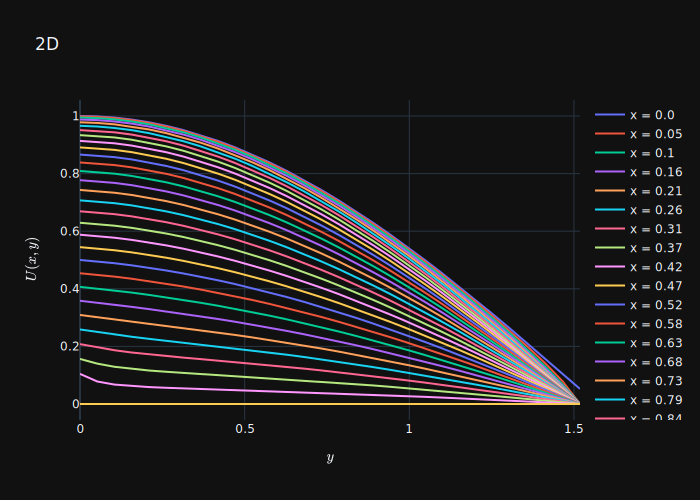

In [33]:
fig_tmp = go.Figure()
for i in range(len(u_relax)):
    fig_tmp.add_trace(go.Scatter(x = y, y = u_relax[i], name = "x = " + str(round(x[i],2))))
print("MSE = ", MSE(x,y,u_relax), "\nMAE = ", MAE(x,y,u_relax))
fig_tmp.update_layout(title = '2D',
                      template = 'plotly_dark',
                      xaxis_title = r'$y$',
                      yaxis_title = r'$U(x,y)$')
fig_tmp.show()

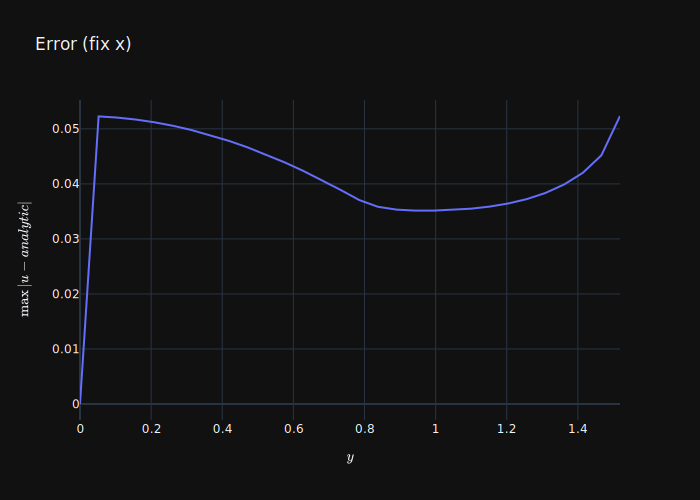

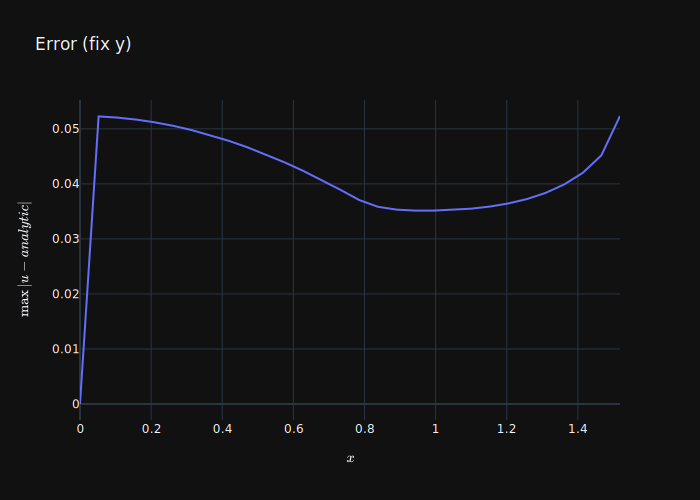

In [34]:
er = normm(x,y,u_relax)
fig_check_tmp = go.Figure()
fig_check_tmp.add_trace(go.Scatter(x = y, y = er))
fig_check_tmp.update_layout(title = "Error (fix x)",
                            xaxis_title = r"$y$",
                            yaxis_title = r'$\max |u - analytic|$', 
                            template='plotly_dark')
fig_check_tmp.show()
fig_check_tmp = go.Figure()
fig_check_tmp.add_trace(go.Scatter(x = x, y = er))
fig_check_tmp.update_layout(title = "Error (fix y)",
                            xaxis_title = r"$x$",
                            yaxis_title = r'$\max |u - analytic|$', 
                            template='plotly_dark')
fig_check_tmp.show()
#save_plot(fig_check_tmp)

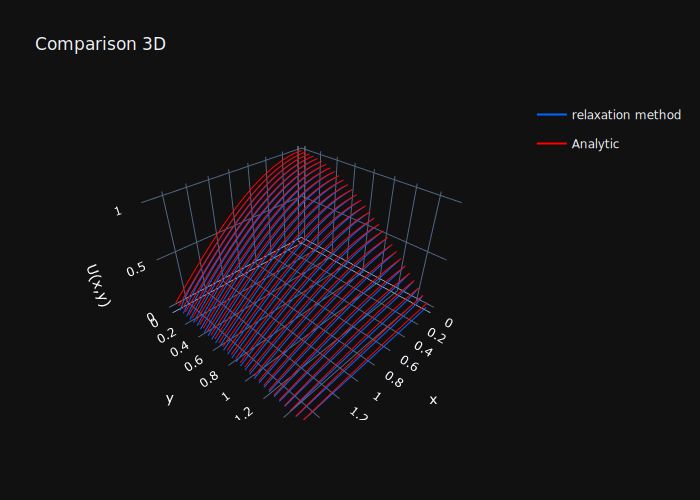

Total error =  7.880070731072716e-07


In [35]:
construct_3d_plot(relaxation, 'relaxation ')

In [36]:
h,e = error_data(relaxation)

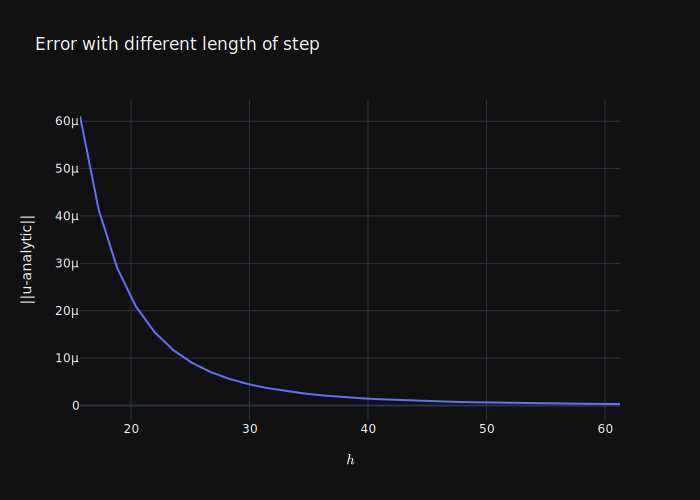

In [37]:
fig_error = go.Figure()
fig_error.add_trace(go.Scatter(x = h, y = e))
fig_error.update_layout(title = 'Error with different length of step',
                       xaxis_title = r'$h$',
                       yaxis_title = '||u-analytic||',
                       template = 'plotly_dark')
fig_error.show()

* Ошибка растет при увеличении количества разбиений

In [38]:
eps = np.linspace(0.0001, 0.1, 20)
mses = []
maes = []
errors = []
for i in tqdm(range(len(eps))):
    u_tmp, x_tmp, y_tmp = relaxation(varepsilon=eps[i])
    errors.append(norm_error(x_tmp, y_tmp, u_tmp))
    mses.append(MSE(x,y,u_tmp))
    maes.append(MAE(x,y,u_tmp))

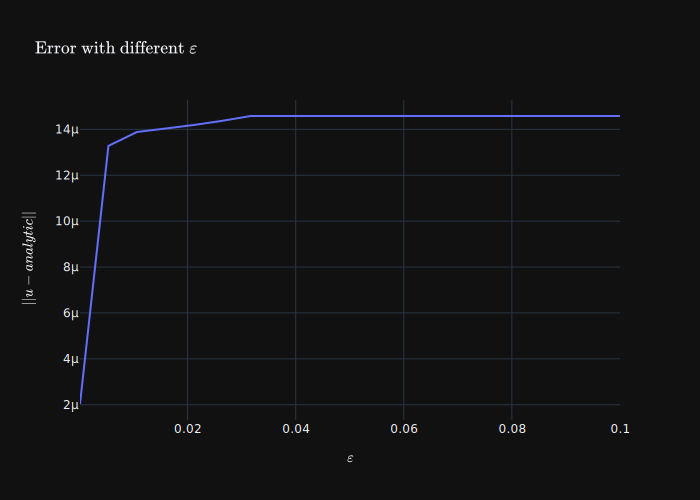

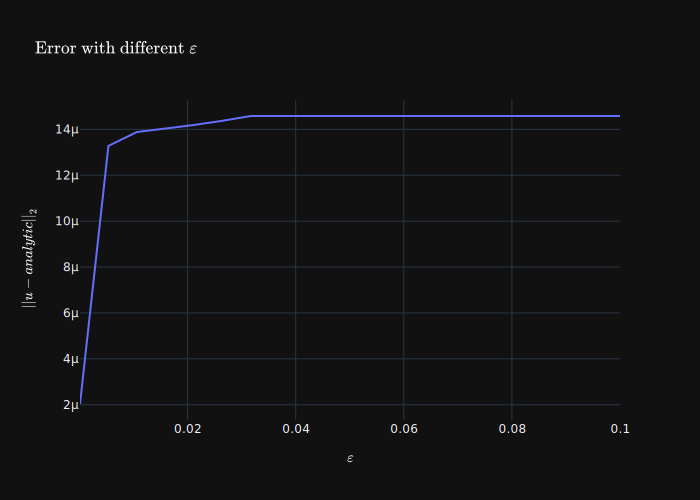

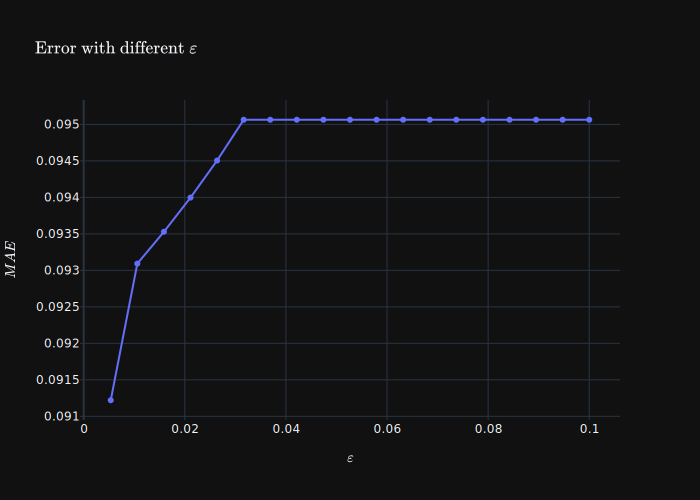

In [39]:
fig_norm = go.Figure()
fig_norm.add_trace(go.Scatter(x = eps, y = errors))
fig_norm.update_layout(title = r'$\text{Error with different }\varepsilon$',
                      xaxis_title = r'$\varepsilon$',
                      yaxis_title = r'$||u - analytic||$',
                       template = 'plotly_dark')
fig_mse = go.Figure()
fig_mse.add_trace(go.Scatter(x = eps, y = mses))
fig_mse.update_layout(title = r'$\text{Error with different }\varepsilon$',
                      xaxis_title = r'$\varepsilon$',
                      yaxis_title = r'$||u - analytic||_2$',
                      template = 'plotly_dark')
fig_mae = go.Figure()
fig_mae.add_trace(go.Scatter(x = eps[1:], y = maes[1:]))
fig_mae.update_layout(title = r'$\text{Error with different }\varepsilon$',
                      xaxis_title = r'$\varepsilon$',
                      yaxis_title = r'$MAE$',
                      template = 'plotly_dark')
fig_norm.show()
fig_mse.show()
fig_mae.show()

<a name = 'step6'></a>
## Метод Зейделя

[К оглавлению](#content)

<a name = 'step6.1'></a>
### Теория

Метод верхних релаксаций с параметром $\omega = 1$

<a name = 'step6.2'></a>
### Реализация

In [44]:
def zeidel(xr = math.pi/2, 
           yr = math.pi/2,
           len_x = 60, len_y = 60, varepsilon = 1e-4):
    return relaxation(xr = xr, yr = yr, len_x = len_x, len_y = len_y, varepsilon=varepsilon, w = 1)

<a name = 'step6.3'></a>
### Исследования

In [47]:
xr = math.pi/2
yr = math.pi/2
len_x = 60
len_y = 60
x_step = xr/len_x
y_step = yr/len_y
varepsilon = 0.0001
x = [0 + x_step*i for i in range(len_x)]
y = [0 + y_step*i for i in range(len_y)]


In [45]:
u_zeidel, X_tmp, Y_tmp = zeidel()

MSE =  7.012236902865161e-07 
MAE =  0.042796558571961775


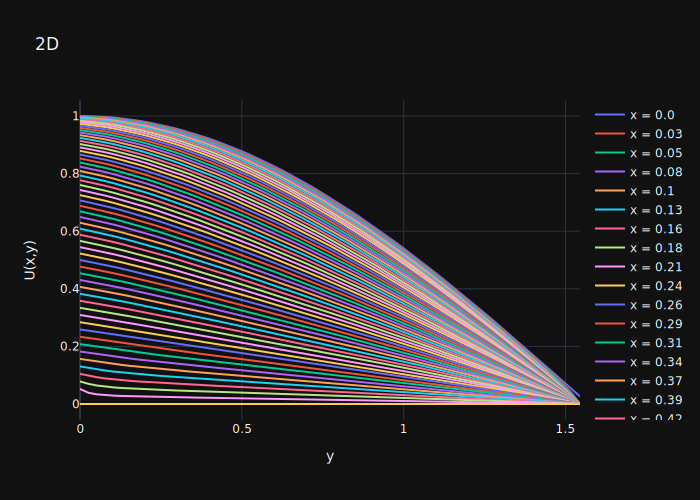

In [48]:
fig_tmp = go.Figure()
for i in range(len(u_zeidel)):
    fig_tmp.add_trace(go.Scatter(x = y, y = u_zeidel[i], name = "x = " + str(round(x[i],2))))
print("MSE = ", MSE(x,y,u_zeidel), "\nMAE = ", MAE(x,y,u_zeidel))
fig_tmp.update_layout(title = '2D',
                      xaxis_title = 'y',
                      yaxis_title = 'U(x,y)',
                      template = 'plotly_dark')
fig_tmp.show()

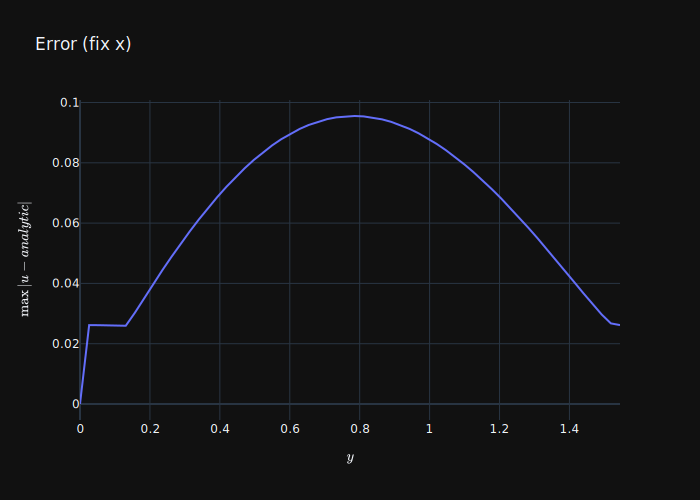

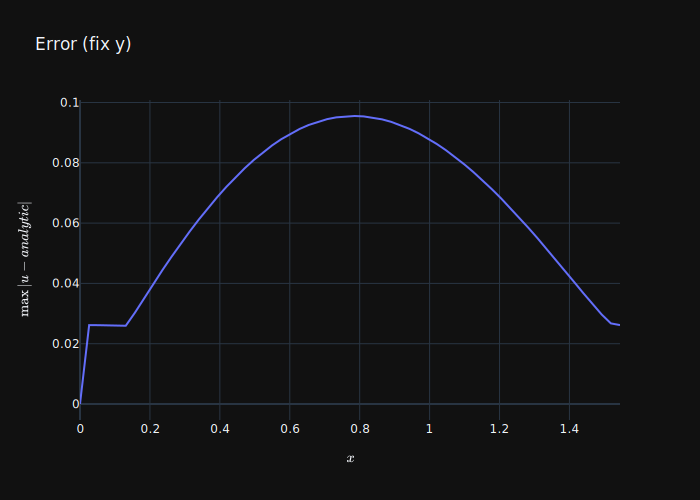

In [49]:
er = normm(x,y,u_zeidel)
fig_check_tmp = go.Figure()
fig_check_tmp.add_trace(go.Scatter(x = y, y = er))
fig_check_tmp.update_layout(title = "Error (fix x)",
                            xaxis_title = r"$y$",
                            yaxis_title = r'$\max |u - analytic|$', 
                            template='plotly_dark')
fig_check_tmp.show()
fig_check_tmp = go.Figure()
fig_check_tmp.add_trace(go.Scatter(x = x, y = er))
fig_check_tmp.update_layout(title = "Error (fix y)",
                            xaxis_title = r"$x$",
                            yaxis_title = r'$\max |u - analytic|$', 
                            template='plotly_dark')
fig_check_tmp.show()
#save_plot(fig_check_tmp)

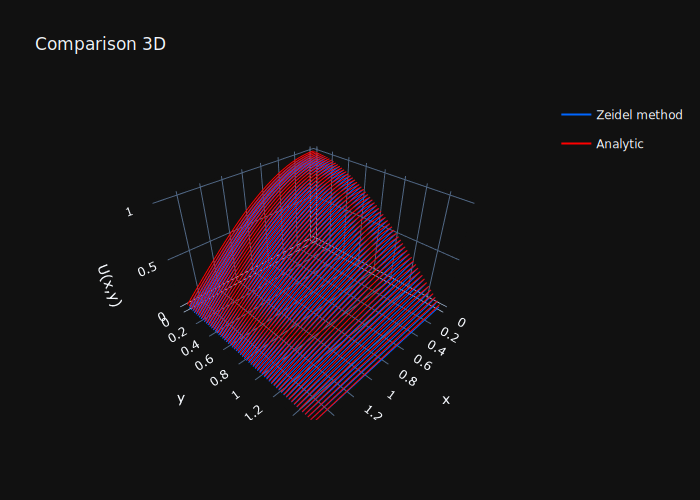

Total error =  7.012236902865161e-07


In [51]:
construct_3d_plot(zeidel, 'Zeidel ')

In [52]:
h,e = error_data(zeidel)

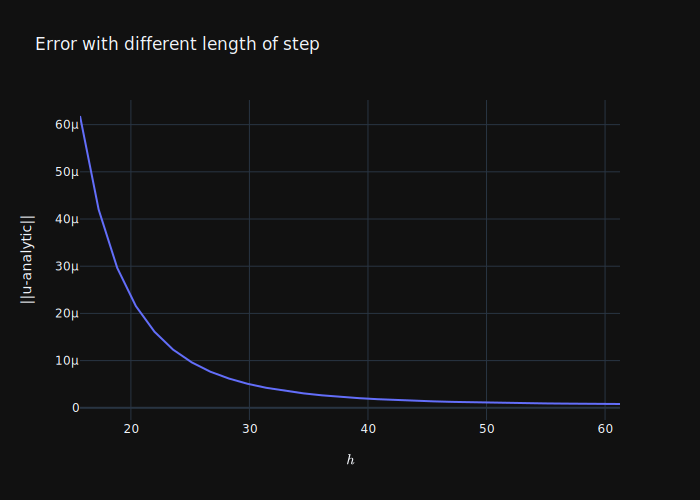

In [53]:
fig_error = go.Figure()
fig_error.add_trace(go.Scatter(x = h, y = e))
fig_error.update_layout(title = 'Error with different length of step',
                       xaxis_title = r'$h$',
                       yaxis_title = '||u-analytic||',
                       template='plotly_dark')
fig_error.show()

* Не смотря на существенное увеличение времени работы программы из-за уменьшения шага по пространству, ошибка так же снижается

In [54]:
eps = np.linspace(0.0001, 0.1, 15)
mses = []
maes = []
errors = []
for i in tqdm(range(len(eps))):
    u_tmp, x_tmp, y_tmp = zeidel(varepsilon=eps[i])
    errors.append(norm_error(x_tmp, y_tmp, u_tmp))
    mses.append(MSE(x,y,u_tmp))
    maes.append(MAE(x,y,u_tmp))

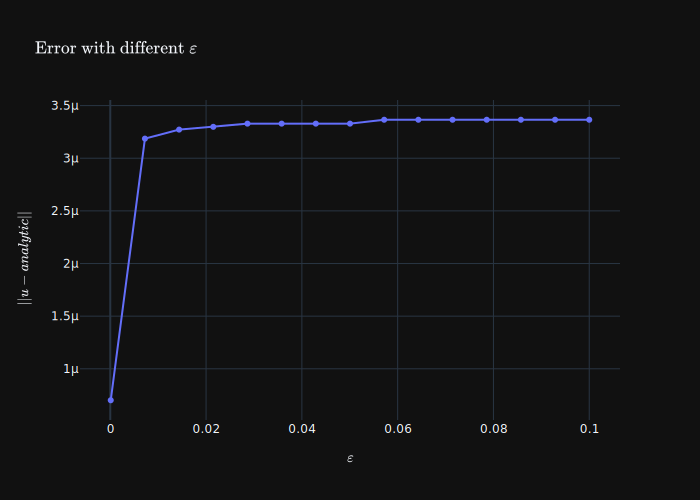

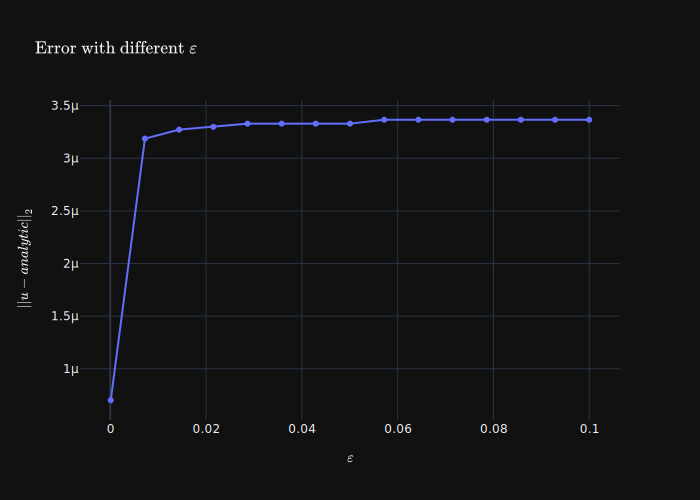

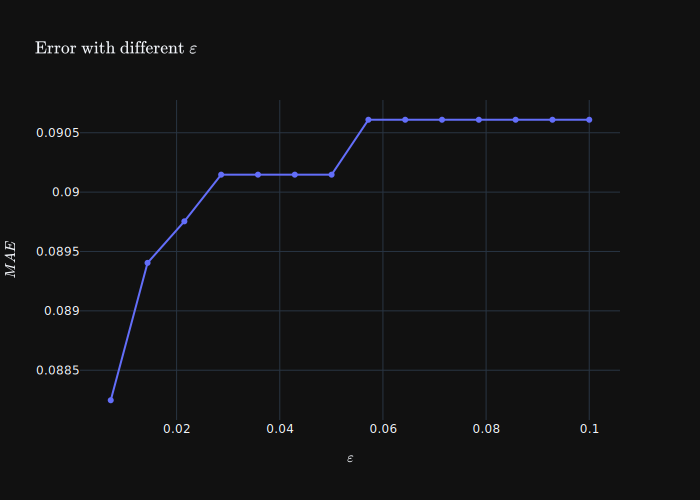

In [55]:
fig_norm = go.Figure()
fig_norm.add_trace(go.Scatter(x = eps, y = errors))
fig_norm.update_layout(title = r'$\text{Error with different }\varepsilon$',
                      xaxis_title = r'$\varepsilon$',
                      yaxis_title = r'$||u - analytic||$',
                       template = 'plotly_dark')
fig_mse = go.Figure()
fig_mse.add_trace(go.Scatter(x = eps, y = mses))
fig_mse.update_layout(title = r'$\text{Error with different }\varepsilon$',
                      xaxis_title = r'$\varepsilon$',
                      yaxis_title = r'$||u - analytic||_2$',
                      template = 'plotly_dark')
fig_mae = go.Figure()
fig_mae.add_trace(go.Scatter(x = eps[1:], y = maes[1:]))
fig_mae.update_layout(title = r'$\text{Error with different }\varepsilon$',
                      xaxis_title = r'$\varepsilon$',
                      yaxis_title = r'$MAE$',
                      template = 'plotly_dark')
fig_norm.show()
fig_mse.show()
fig_mae.show()

* Похожие на метод релаксации тренды